In [1]:
#BASIC LIBRARIES TO BE NEEDED
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\USER\Anaconda3\envs\keras_env\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### READ DATASET RAIN

In [2]:
dataset = pd.read_csv('dataset_rain.csv')

In [3]:
dataset.head()

,Day,Month,Year,MinPressure,MaxPressure,MinVapour,MaxVapour,MinRelativeHumidity,MaxRelativeHumidity,MinTemperature,MaxTemperature,Rain,MinRadiation,MaxRadiation
0,1,1,1989,1013.9,1018.9,15.8,15.1,67,71,25.5,14.1,0.0,NaN,NaN
1,2,1,1989,1015.5,1017.5,14.3,16.5,51,77,26.3,15.0,0.0,NaN,NaN
2,3,1,1989,1013.8,1017.5,15.2,16.9,57,77,26.5,13.7,0.0,NaN,NaN
3,4,1,1989,1013.8,1017.9,15.1,14.9,54,70,27.7,15.3,0.0,NaN,NaN
4,5,1,1989,1014.1,1017.0,15.8,15.2,59,70,25.4,13.9,0.0,NaN,NaN


In [4]:
dataset.columns

Index(['Day', 'Month', 'Year', 'MinPressure', 'MaxPressure', 'MinVapour',
       'MaxVapour', 'MinRelativeHumidity', 'MaxRelativeHumidity',
       'MinTemperature', 'MaxTemperature', 'Rain', 'MinRadiation',
       'MaxRadiation'],
      dtype='object')

In [5]:
dataset.corr()

,Day,Month,Year,MinPressure,MaxPressure,MinVapour,MaxVapour,MinRelativeHumidity,MaxRelativeHumidity,MinTemperature,MaxTemperature,Rain,MinRadiation,MaxRadiation
Day,1.000000,0.011337,0.005534,-0.026737,-0.023597,0.012438,-0.009908,0.020194,0.001810,-0.007138,-0.007970,-0.025246,0.031925,-0.012527
Month,0.011337,1.000000,-0.007650,-0.015876,-0.042033,0.270620,0.195072,0.415881,0.190686,-0.025137,0.156416,0.081969,-0.182563,0.042846
Year,0.005534,-0.007650,1.000000,-0.003431,-0.010428,0.089055,0.083138,0.094404,0.058577,0.052545,0.031824,0.000759,-0.039054,-0.022513
MinPressure,-0.026737,-0.015876,-0.003431,1.000000,0.981270,-0.808819,-0.825122,-0.476431,-0.361314,-0.614129,-0.825390,-0.294619,-0.251876,-0.588964
MaxPressure,-0.023597,-0.042033,-0.010428,0.981270,1.000000,-0.812156,-0.828078,-0.518096,-0.396837,-0.573611,-0.817011,-0.317833,-0.205878,-0.595545
MinVapour,0.012438,0.270620,0.089055,-0.808819,-0.812156,1.000000,0.900799,0.741861,0.492866,0.575405,0.859213,0.280680,0.164914,0.602115
MaxVapour,-0.009908,0.195072,0.083138,-0.825122,-0.828078,0.900799,1.000000,0.575771,0.551166,0.684524,0.920069,0.239333,0.233987,0.592770
MinRelativeHumidity,0.020194,0.415881,0.094404,-0.476431,-0.518096,0.741861,0.575771,1.000000,0.637929,-0.004094,0.438386,0.378737,-0.244592,0.418813
MaxRelativeHumidity,0.001810,0.190686,0.058577,-0.361314,-0.396837,0.492866,0.551166,0.637929,1.000000,-0.030143,0.309932,0.353827,-0.316643,0.321599
MinTemperature,-0.007138,-0.025137,0.052545,-0.614129,-0.573611,0.575405,0.684524,-0.004094,-0.030143,1.000000,0.788499,0.000678,0.552022,0.359069


# hmm normalizingg

In [6]:
cols_to_norm =['Day','Month', 'Year', 'MinPressure', 'MaxPressure', 'MinVapour',
     'MaxVapour', 'MinRelativeHumidity', 'MaxRelativeHumidity',
   'MinTemperature', 'MaxTemperature','Rain']

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
def normal(x):
   return (x-x.min())/(x.max()-x.min())

In [10]:
dataset[cols_to_norm] = dataset[cols_to_norm].apply(lambda x: normal(x))

In [11]:
dataset[2000:2100]

,Day,Month,Year,MinPressure,MaxPressure,MinVapour,MaxVapour,MinRelativeHumidity,MaxRelativeHumidity,MinTemperature,MaxTemperature,Rain,MinRadiation,MaxRadiation
2000,0.100000,0.636364,0.833333,0.309904,0.353760,0.761610,0.833333,0.722892,0.7875,0.630252,0.866359,0.029332,2.50,1.58
2001,0.133333,0.636364,0.833333,0.306709,0.350975,0.773994,0.815152,0.686747,0.6875,0.630252,0.880184,0.002173,2.25,1.49
2002,0.166667,0.636364,0.833333,0.319489,0.334262,0.792570,0.833333,0.963855,0.7000,0.689076,0.912442,0.000000,2.96,1.58
2003,0.200000,0.636364,0.833333,0.309904,0.378830,0.897833,0.827273,0.855422,0.7625,0.630252,0.847926,0.409017,3.30,2.03
2004,0.233333,0.636364,0.833333,0.300319,0.328691,0.857585,0.821212,0.807229,0.7500,0.668067,0.866359,0.065182,2.30,1.63
2005,0.266667,0.636364,0.833333,0.281150,0.331476,0.811146,0.815152,0.891566,0.7375,0.655462,0.880184,0.003802,3.14,1.41
2006,0.300000,0.636364,0.833333,0.287540,0.314763,0.817337,0.866667,0.771084,0.8125,0.584034,0.866359,0.077132,2.50,1.42
2007,0.333333,0.636364,0.833333,0.405751,0.376045,0.817337,0.854545,0.903614,0.9000,0.445378,0.857143,0.135253,0.68,0.66
2008,0.366667,0.636364,0.833333,0.495208,0.479109,0.817337,0.821212,0.819277,0.8875,0.554622,0.829493,0.026616,1.58,1.33
2009,0.400000,0.636364,0.833333,0.495208,0.523677,0.792570,0.866667,0.746988,0.8000,0.642857,0.838710,0.091255,2.53,1.74


## Feature columns distinguising

In [12]:
day = tf.feature_column.numeric_column('Day')
month = tf.feature_column.numeric_column('Month')
year = tf.feature_column.numeric_column('Year')
minpressure = tf.feature_column.numeric_column('MinPressure')
maxpressure = tf.feature_column.numeric_column('MaxPressure')
minvapour = tf.feature_column.numeric_column('MinVapour')
maxvapour = tf.feature_column.numeric_column('MaxVapour')
minrh = tf.feature_column.numeric_column('MinRelativeHumidity')
maxrh = tf.feature_column.numeric_column('MaxRelativeHumidity')
mintemp = tf.feature_column.numeric_column('MinTemperature')
maxtemp = tf.feature_column.numeric_column('MaxTemperature')

In [13]:
feat_col = [minpressure,maxpressure,minvapour,maxvapour,minrh,maxrh,maxtemp]

### SPLIT

In [14]:
x_data = dataset.iloc[:, :-3]

In [15]:
x_data.head()

,Day,Month,Year,MinPressure,MaxPressure,MinVapour,MaxVapour,MinRelativeHumidity,MaxRelativeHumidity,MinTemperature,MaxTemperature
0,0.000000,0.0,0.0,0.827476,0.863510,0.229102,0.230303,0.602410,0.6375,0.315126,0.281106
1,0.033333,0.0,0.0,0.878594,0.824513,0.182663,0.272727,0.409639,0.7125,0.348739,0.322581
2,0.066667,0.0,0.0,0.824281,0.824513,0.210526,0.284848,0.481928,0.7125,0.357143,0.262673
3,0.100000,0.0,0.0,0.824281,0.835655,0.207430,0.224242,0.445783,0.6250,0.407563,0.336406
4,0.133333,0.0,0.0,0.833866,0.810585,0.229102,0.233333,0.506024,0.6250,0.310924,0.271889


In [16]:
y_data = dataset['Rain']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state=101)

In [19]:
x_train.head()

,Day,Month,Year,MinPressure,MaxPressure,MinVapour,MaxVapour,MinRelativeHumidity,MaxRelativeHumidity,MinTemperature,MaxTemperature
2109,0.666667,0.909091,0.833333,0.798722,0.799443,0.377709,0.369697,0.578313,0.6000,0.533613,0.423963
456,0.166667,0.272727,0.166667,0.648562,0.682451,0.331269,0.536364,0.409639,0.6875,0.521008,0.585253
282,0.433333,0.818182,0.000000,0.568690,0.565460,0.653251,0.696970,0.650602,0.7000,0.600840,0.783410
1920,0.500000,0.363636,0.833333,0.386581,0.454039,0.829721,0.884848,0.554217,0.6625,0.873950,0.783410
843,0.066667,0.454545,0.333333,0.392971,0.442897,0.557276,0.854545,0.397590,0.7125,0.756303,0.917051


Text(0.5,1,'Year Vs Rainfall')

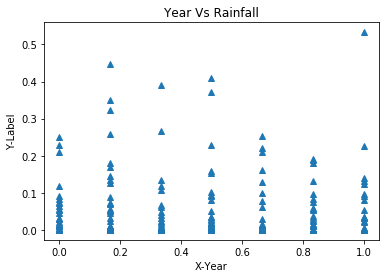

In [20]:
X = x_train['Year']
plt.plot(X[1000:1500], y_train[1000:1500], '^')
plt.xlabel('X-Year')
plt.ylabel('Y-Label')
plt.title('Year Vs Rainfall')

In [21]:
sess = tf.InteractiveSession()

In [22]:
y_test.head()

2032    0.045627
653     0.000000
2057    0.000000
659     0.000000
458     0.000000
Name: Rain, dtype: float64

### INPUT FUNCTIONS & MODEL

In [23]:
input_func = tf.estimator.inputs.pandas_input_fn(x_train,y_train,batch_size=15,num_epochs=500,shuffle=True)

In [24]:
model = tf.estimator.DNNRegressor(hidden_units=[100,95,105,98,102,100],feature_columns=feat_col)  
#model = tf.estimator.LinearRegressor(feature_columns=feat_col, optimizer='Adagrad')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\USER\\AppData\\Local\\Temp\\tmp5rgt1ofu', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000289E30F20F0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [25]:
model.train(input_fn=input_func,steps=5000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into C:\Users\USER\AppData\Local\Temp\tmp5rgt1ofu\model.ckpt.
INFO:tensorflow:loss = 0.1782378, step = 1
INFO:tensorflow:global_step/sec: 211.277
INFO:tensorflow:loss = 0.016496737, step = 101 (0.474 sec)
INFO:tensorflow:global_step/sec: 245.37
INFO:tensorflow:loss = 0.010356791, step = 201 (0.409 sec)
INFO:tensorflow:global_step/sec: 243.589
INFO:tensorflow:loss = 0.08358419, step = 301 (0.412 sec)
INFO:tensorflow:global_step/sec: 238.338
INFO:tensorflow:loss = 0.13054514, step = 401 (0.418 sec)
INFO:tensorflow:global_step/sec: 242.438
INFO:tensorflow:loss = 0.081266865, step = 501 (0.412 sec)
INFO:tensorflow:global_step/sec: 244.831
INFO:tensorflow:loss = 0.014845057, step = 601 (0.408 sec)
INFO:tensorflow:global_step/sec: 236.926
INFO:tensorflow:loss = 0.0032006188, step = 701 (0.422 sec)
INFO:tensorflow:global_step/sec: 239.386
INFO:tensorflow:loss = 0.010288378, step = 801 (0.417 sec)
INFO:tensorf

In [26]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(x_test,y_test,batch_size=8,num_epochs=1,shuffle=False)

In [27]:
model.evaluate(eval_input_func)

INFO:tensorflow:Starting evaluation at 2018-02-17-13:18:14
INFO:tensorflow:Restoring parameters from C:\Users\USER\AppData\Local\Temp\tmp5rgt1ofu\model.ckpt-5000
INFO:tensorflow:Finished evaluation at 2018-02-17-13:18:15
INFO:tensorflow:Saving dict for global step 5000: average_loss = 0.0037828523, global_step = 5000, loss = 0.03002136


{'average_loss': 0.0037828523, 'global_step': 5000, 'loss': 0.03002136}

In [28]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(x_test,batch_size=8,num_epochs=1,shuffle=False)

In [29]:
pred_gen = model.predict(pred_input_func)

In [30]:
type(pred_gen)

generator

In [31]:
predictions = list(pred_gen) # predictions is a list of dictionary

INFO:tensorflow:Restoring parameters from C:\Users\USER\AppData\Local\Temp\tmp5rgt1ofu\model.ckpt-5000


In [45]:
y_train.size

1738

In [51]:
predictions

[{'predictions': array([0.06395352], dtype=float32)},
 {'predictions': array([-0.00380847], dtype=float32)},
 {'predictions': array([0.01087938], dtype=float32)},
 {'predictions': array([0.00275705], dtype=float32)},
 {'predictions': array([0.0088141], dtype=float32)},
 {'predictions': array([0.32985982], dtype=float32)},
 {'predictions': array([0.15692596], dtype=float32)},
 {'predictions': array([-0.0071631], dtype=float32)},
 {'predictions': array([-0.0040674], dtype=float32)},
 {'predictions': array([0.02122074], dtype=float32)},
 {'predictions': array([-0.00538421], dtype=float32)},
 {'predictions': array([-0.00543502], dtype=float32)},
 {'predictions': array([0.01889302], dtype=float32)},
 {'predictions': array([-0.00633466], dtype=float32)},
 {'predictions': array([0.11582299], dtype=float32)},
 {'predictions': array([0.0338737], dtype=float32)},
 {'predictions': array([0.01241028], dtype=float32)},
 {'predictions': array([0.1351583], dtype=float32)},
 {'predictions': array([0.0

In [62]:
p = [p['predictions'] for p in predictions]
# p = [p['predictions'][0] for p in predictions] , its also same

In [63]:
p = np.asarray(p)

In [64]:
y_test=np.asarray(y_test)

In [65]:
y_test[0:20]

array([0.04562738, 0.        , 0.        , 0.        , 0.        ,
       0.19500272, 0.26072787, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.11787072,
       0.        , 0.        , 0.22542097, 0.06952743, 0.        ])

In [66]:
p[0:20]

array([[ 0.06395352],
       [-0.00380847],
       [ 0.01087938],
       [ 0.00275705],
       [ 0.0088141 ],
       [ 0.32985982],
       [ 0.15692596],
       [-0.0071631 ],
       [-0.0040674 ],
       [ 0.02122074],
       [-0.00538421],
       [-0.00543502],
       [ 0.01889302],
       [-0.00633466],
       [ 0.11582299],
       [ 0.0338737 ],
       [ 0.01241028],
       [ 0.1351583 ],
       [ 0.04216351],
       [-0.00252277]], dtype=float32)

In [67]:
count=0
for i in range(0,746):
    if(y_test[i]-p[i]<0.05 and y_test[i]-p[i]>-0.05):
        count=count+1
print(count)
print(count/746)

626
0.839142091152815


In [68]:
y_test.size

746

In [69]:
X=x_test['MinPressure']

Text(0.5,1,'PREDICTED GRAPH ON TEST DATA')

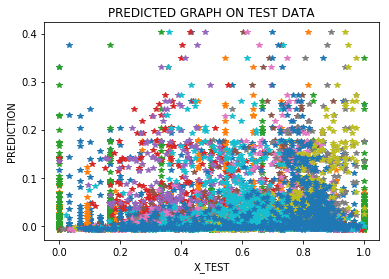

In [70]:
plt.plot(x_test,p,'*')
plt.xlabel("X_TEST")
plt.ylabel("PREDICTION")
plt.title("PREDICTED GRAPH ON TEST DATA")

Text(0.5,1,'ORIGINAL TEST DATASET')

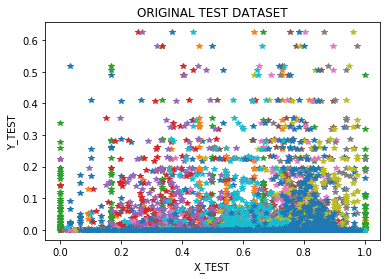

In [71]:
plt.plot(x_test,y_test,'*')
plt.xlabel("X_TEST")
plt.ylabel("Y_TEST")
plt.title("ORIGINAL TEST DATASET")

Text(0.5,1,'ORIGINAL OUTPUTS VS PREDICTED OUTPUTS')

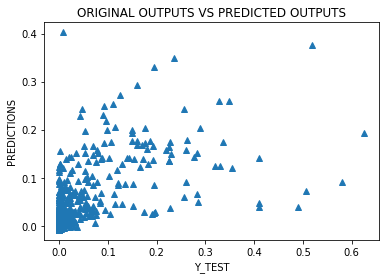

In [72]:
plt.plot(y_test,p,'^')
plt.xlabel("Y_TEST")
plt.ylabel("PREDICTIONS")
plt.title("ORIGINAL OUTPUTS VS PREDICTED OUTPUTS")